In [106]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [107]:
lista_frames = []
path = 'ventas_comercial'
files = [file for file in os.listdir('/Users/lolonastri/Desktop/POO_UCEMA/trabajos_practicos/trabajo_practico_1/obras_shakespeare/ventas_comercial')]
for f in files:
  df_temp = pd.read_csv(path + '/' + f)
  lista_frames.append(df_temp)

In [108]:
df_shakespeare = pd.concat(lista_frames)
df_shakespeare

,Unnamed: 0,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
0,43490,43491,King John,11.0,5.5.97,KING HENRY VIII,ACT I
1,43491,43492,King John,11.0,5.5.97,KING HENRY VIII,SCENE I. KING JOHN'S palace.
2,43492,43493,King John,11.0,NaN,KING HENRY VIII,"Enter KING JOHN, QUEEN ELINOR, PEMBROKE, ESSEX..."
3,43493,43494,King John,1.0,1.1.1,KING JOHN,"Now, say, Chatillon, what would France with us?"
4,43494,43495,King John,2.0,1.1.2,CHATILLON,"Thus, after greeting, speaks the King of France"
...,...,...,...,...,...,...,...
2826,66991,66992,Merry Wives of Windsor,74.0,5.5.232,MISTRESS PAGE,Sir John and all.
2827,66992,66993,Merry Wives of Windsor,75.0,5.5.233,FORD,"Let it be so. Sir John,"
2828,66993,66994,Merry Wives of Windsor,75.0,5.5.234,FORD,To Master Brook you yet shall hold your word
2829,66994,66995,Merry Wives of Windsor,75.0,5.5.235,FORD,For he tonight shall lie with Mistress Ford.


In [109]:
# Cantidad de variables
print("Cantidad de variables:", len(df_shakespeare.columns))

Cantidad de variables: 7


In [110]:
# Contar los diferentes tipos de obras
print("Cantidad de tipos de obras:", df_shakespeare["Play"].nunique())

Cantidad de tipos de obras: 36


In [111]:
df_shakespeare["Play"].value_counts()

Play
Hamlet                      4244
Coriolanus                  3992
Cymbeline                   3958
Richard III                 3941
Antony and Cleopatra        3862
King Lear                   3766
Othello                     3762
Troilus and Cressida        3711
A Winters Tale              3489
Henry VIII                  3419
Henry V                     3395
Henry VI Part 2             3334
Romeo and Juliet            3313
Henry IV                    3205
Henry VI Part 3             3138
Alls well that ends well    3083
Measure for measure         2998
Loves Labours Lost          2986
Henry VI Part 1             2983
Richard II                  2937
Merry Wives of Windsor      2831
As you like it              2822
Taming of the Shrew         2806
Merchant of Venice          2802
Julius Caesar               2771
King John                   2766
Titus Andronicus            2726
Much Ado about nothing      2704
Timon of Athens             2662
Twelfth Night               2648
Peric

In [112]:
df_shakespeare.columns

Index(['Unnamed: 0', 'Dataline', 'Play', 'PlayerLinenumber', 'ActSceneLine',
       'Player', 'PlayerLine'],
      dtype='object')

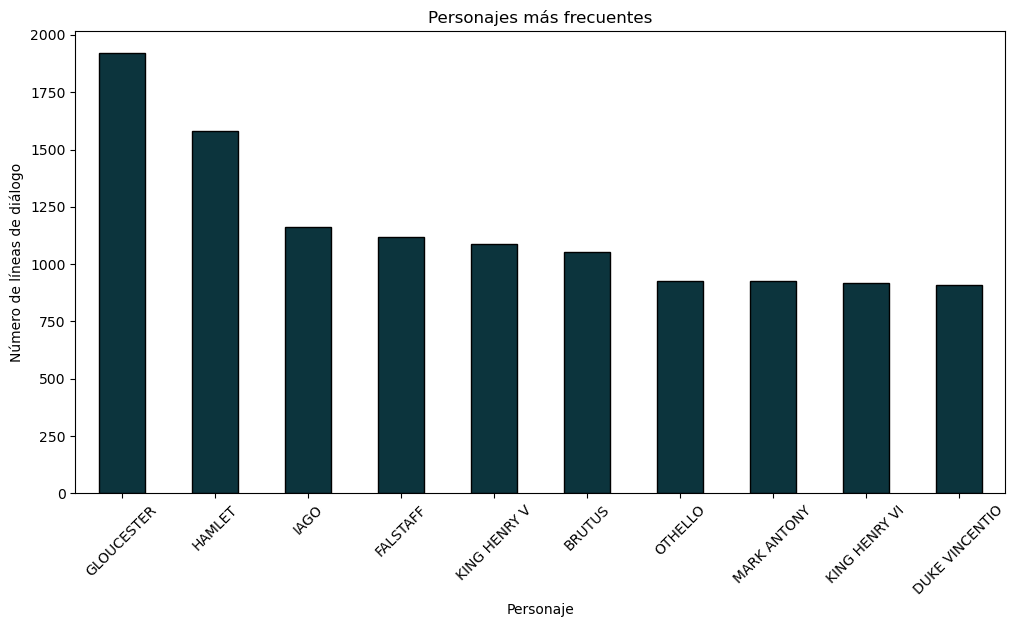

In [113]:
frecuencia_personajes = df_shakespeare['Player'].value_counts().head(10)
plt.figure(figsize=(12, 6)) 
frecuencia_personajes.plot(kind='bar', color='#0c343d', edgecolor='black' )
plt.xlabel('Personaje')
plt.ylabel('Número de líneas de diálogo')
plt.title('Personajes más frecuentes')
plt.xticks(rotation=45)
plt.show()

___

# 1) ¿De las obras de HENRY, cuáles son los actores con más líneas en las obras?

In [114]:
filtro_henry = df_shakespeare['Play'].str.contains('Henry')
obras_de_henry = df_shakespeare[filtro_henry]

In [115]:
agrupadas = obras_de_henry.groupby('Player')['PlayerLinenumber'].sum()
ordenadas_y_agrupadas = agrupadas.sort_values(ascending=False).head()
ordenadas_y_agrupadas

Player
FALSTAFF           36414.0
KING HENRY V       32902.0
PRINCE HENRY       31413.0
CARDINAL WOLSEY    24039.0
GLOUCESTER         21694.0
Name: PlayerLinenumber, dtype: float64

In [116]:
agrupadas = obras_de_henry.groupby('Player')['PlayerLinenumber'].sum()
ordenadas_y_agrupadas = agrupadas.sort_values(ascending=False).head()

resultado_df = pd.DataFrame({'Personaje': ordenadas_y_agrupadas.index, 'Total de líneas por actor': ordenadas_y_agrupadas.values})
resultado_df

,Personaje,Total de líneas por actor
0,FALSTAFF,36414.0
1,KING HENRY V,32902.0
2,PRINCE HENRY,31413.0
3,CARDINAL WOLSEY,24039.0
4,GLOUCESTER,21694.0


In [117]:
agrupadas = obras_de_henry.groupby('Player')['PlayerLinenumber'].sum()
ordenadas_y_agrupadas = agrupadas.sort_values().head()
ordenadas_y_agrupadas

Player
Ostler             2.0
Servants           2.0
First Messenger    2.0
First Murder       3.0
Garter             4.0
Name: PlayerLinenumber, dtype: float64

In [118]:
agrupadas = obras_de_henry.groupby('Player')['PlayerLinenumber'].sum()
ordenadas_y_agrupadas2 = agrupadas.sort_values().head()

resultado_df2 = pd.DataFrame({'Personaje': ordenadas_y_agrupadas2.index, 'Total de líneas por actor': ordenadas_y_agrupadas2.values})
resultado_df2

,Personaje,Total de líneas por actor
0,Ostler,2.0
1,Servants,2.0
2,First Messenger,2.0
3,First Murder,3.0
4,Garter,4.0


In [119]:
agrupadas = obras_de_henry.groupby('Player')['PlayerLinenumber'].sum()
ordenadas_y_agrupadas = agrupadas.sort_values().describe()
ordenadas_y_agrupadas

count      229.000000
mean      2184.764192
std       5217.669383
min          2.000000
25%         93.000000
50%        476.000000
75%       1786.000000
max      36414.000000
Name: PlayerLinenumber, dtype: float64

___

    ➢ Conclusión:

    Se puede observar que el promedio de líneas por actor en las obras de HENRY es de 2184,76.

    Además hay una gran dispersión entre los datos ya que el 'Player' 'FALSTAFF' con 36.414 líneas, es el que más líneas tiene, mientras que los que menos diálogo tienen, tienen como máximo 2 lineas.

___

    ➢ Con respecto a esta pregunta, pudimos notar 2 tipos de sesgos:

    1) Sesgo de selección: La pregunta asume que los datos disponibles se refieren a obras de HENRY y que estos datos son representativos de todas las obras.

    2) Sesgo de preferencia de autor: La pregunta parte del supuesto de que las obras de HENRY son las únicas relevantes para este análisis, lo que podría reflejar una preferencia por este autor en particular.

___

In [120]:
frase_especifica = "ACT VI"
conteo_frases = df_shakespeare[df_shakespeare['PlayerLine'].str.contains(frase_especifica, case=False, regex=True)]

if not conteo_frases.empty:
    conteo_frases_por_obra = conteo_frases['Play'].value_counts()
    obra_mas_repeticiones = conteo_frases_por_obra.idxmax()
    frecuencia_maxima = conteo_frases_por_obra.max()
    
    print("La frase '{}' se repite más en la obra '{}' con {} repeticiones.".format(frase_especifica, obra_mas_repeticiones, frecuencia_maxima))
else:
    print("La frase '{}' no se encuentra en ninguna obra en el DataFrame.".format(frase_especifica))


La frase 'ACT VI' se repite más en la obra 'Troilus and Cressida' con 1 repeticiones.
